In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# from sklearn import svm
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
train=pd.read_csv('SalaryData_Train(1).csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
test=pd.read_csv('SalaryData_Test(1).csv.crdownload')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [ ]:
train.shape

(21680, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21680 entries, 0 to 21679
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            21680 non-null  int64  
 1   workclass      21680 non-null  object 
 2   education      21680 non-null  object 
 3   educationno    21680 non-null  int64  
 4   maritalstatus  21680 non-null  object 
 5   occupation     21680 non-null  object 
 6   relationship   21680 non-null  object 
 7   race           21680 non-null  object 
 8   sex            21680 non-null  object 
 9   capitalgain    21679 non-null  float64
 10  capitalloss    21679 non-null  float64
 11  hoursperweek   21679 non-null  float64
 12  native         21679 non-null  object 
 13  Salary         21679 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21647,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
21659,25,Local-gov,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
21660,50,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
21673,45,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K


In [ ]:
train=train.drop_duplicates()
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
train.shape

(19789, 14)

In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [ ]:
test.shape

(10538, 14)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10538 entries, 0 to 10537
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10538 non-null  int64  
 1   workclass      10538 non-null  object 
 2   education      10538 non-null  object 
 3   educationno    10538 non-null  int64  
 4   maritalstatus  10538 non-null  object 
 5   occupation     10537 non-null  object 
 6   relationship   10537 non-null  object 
 7   race           10537 non-null  object 
 8   sex            10537 non-null  object 
 9   capitalgain    10537 non-null  float64
 10  capitalloss    10537 non-null  float64
 11  hoursperweek   10537 non-null  float64
 12  native         10537 non-null  object 
 13  Salary         10537 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10485,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
10488,61,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
10517,29,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
10521,42,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
test=test.drop_duplicates()
test.shape

(10064, 14)

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [ ]:
test.dropna(axis=0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,5,6,3,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,11,9,3,4,0,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,7,12,3,10,0,4,1,0.0,0.0,40.0,37,>50K
3,44,2,15,10,3,6,0,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,0,6,5,7,1,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,45,2,9,13,1,3,4,4,1,0.0,0.0,45.0,37,>50K
10533,25,2,7,12,1,7,1,4,0,0.0,0.0,32.0,37,<=50K
10534,42,2,7,12,5,9,3,4,1,0.0,0.0,40.0,37,<=50K
10535,24,2,15,10,3,0,0,4,1,0.0,0.0,40.0,37,<=50K


In [ ]:
train.dropna(axis=0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21672,34,2,11,9,4,13,3,4,1,0.0,1980.0,40.0,37,<=50K
21674,32,2,1,7,0,6,4,4,0,0.0,0.0,40.0,37,<=50K
21675,40,0,15,10,4,0,1,4,0,0.0,0.0,50.0,37,<=50K
21677,25,2,11,9,2,12,0,4,1,0.0,0.0,84.0,37,<=50K


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           1
dtype: int64

In [ ]:
train.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21677,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21678,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train = train.drop(labels=[21678],axis=0)

In [ ]:
test = test.drop(labels=[10537],axis=0)

In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,19788.000000,19788.00000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000,19788.000000
mean,38.945371,2.21134,10.271124,10.142410,2.563372,6.039620,1.445624,3.655246,0.668688,1158.784667,95.637255,41.066252,35.272640
std,13.226030,0.99242,3.849000,2.588063,1.526199,4.037431,1.613741,0.860752,0.470697,7594.448183,419.649991,12.238570,6.218199
min,17.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,38.000000,2.00000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.00000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [ ]:
test.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000,10062.000000
mean,38.986583,2.232061,10.241503,10.111707,3.601073,5.994534,1.426953,3.676704,0.670841,1198.402504,93.538859,41.086166,35.453091
std,13.411618,0.992024,3.852580,2.592421,1.520842,4.002145,1.598871,0.835746,0.469931,8127.338659,415.552781,12.263427,5.849344
min,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,3.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,3.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,5.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,7.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [ ]:
train['Salary'].value_counts()

 <=50K    14810
 >50K      4978
Name: Salary, dtype: int64

In [ ]:
test['Salary'].value_counts()

 <=50K    7562
 >50K     2501
Name: Salary, dtype: int64

In [ ]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
0,2134,356
1,7,0
2,1830,546
3,1375,1253
4,610,83
5,769,59
6,1089,160
7,2053,104
8,109,0


In [ ]:
pd.crosstab(train['workclass'],train['Salary'])

Salary,<=50K,>50K
workclass,,
0,432,265
1,1058,425
2,11037,3117
3,336,421
4,1287,510
5,652,240
6,8,0


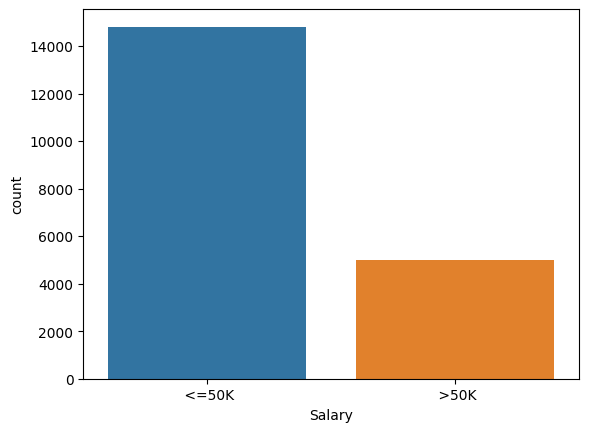

 <=50K    14810
 >50K      4978
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train['Salary'].value_counts()

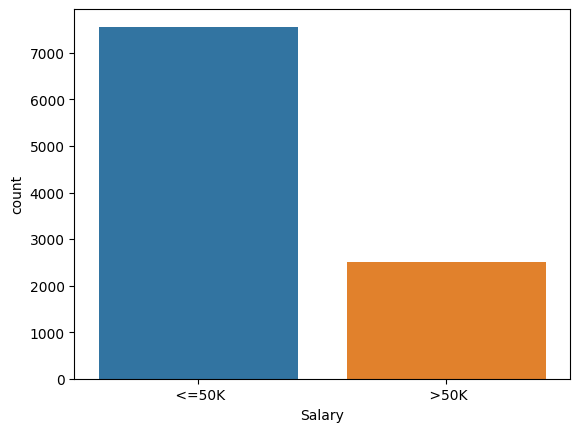

 <=50K    7562
 >50K     2501
Name: Salary, dtype: int64

In [ ]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

<Axes: xlabel='sex'>

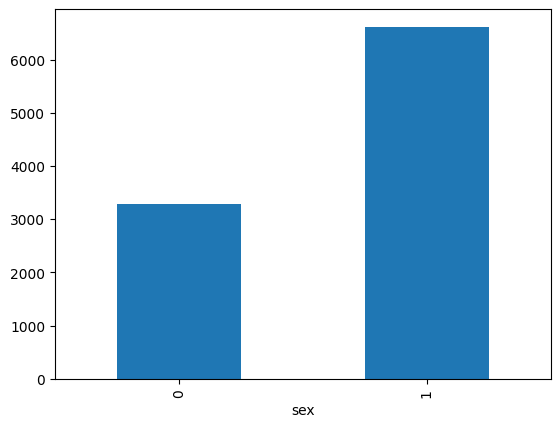

In [ ]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

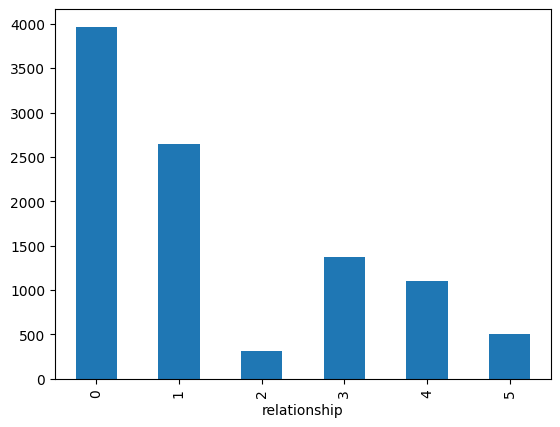

In [ ]:
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar')

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        train[i]= number.fit_transform(train[i])
        test[i]=number.fit_transform(test[i])

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21674,32,2,1,7,0,6,4,4,0,0.0,0.0,40.0,37,<=50K
21675,40,0,15,10,4,0,1,4,0,0.0,0.0,50.0,37,<=50K
21677,25,2,11,9,2,12,0,4,1,0.0,0.0,84.0,37,<=50K
21678,42,2,15,10,2,13,0,4,1,0.0,0.0,57.0,37,<=50K


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,5,6,3,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,11,9,3,4,0,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,7,12,3,10,0,4,1,0.0,0.0,40.0,37,>50K
3,44,2,15,10,3,6,0,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,0,6,5,7,1,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,25,2,7,12,1,7,1,4,0,0.0,0.0,32.0,37,<=50K
10534,42,2,7,12,5,9,3,4,1,0.0,0.0,40.0,37,<=50K
10535,24,2,15,10,3,0,0,4,1,0.0,0.0,40.0,37,<=50K
10536,55,4,6,5,3,4,0,4,1,0.0,0.0,30.0,37,<=50K


In [ ]:
train.dropna(axis=0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21672,34,2,11,9,4,13,3,4,1,0.0,1980.0,40.0,37,<=50K
21674,32,2,1,7,0,6,4,4,0,0.0,0.0,40.0,37,<=50K
21675,40,0,15,10,4,0,1,4,0,0.0,0.0,50.0,37,<=50K
21677,25,2,11,9,2,12,0,4,1,0.0,0.0,84.0,37,<=50K


In [ ]:
test.dropna(axis=0)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,5,6,3,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,11,9,3,4,0,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,7,12,3,10,0,4,1,0.0,0.0,40.0,37,>50K
3,44,2,15,10,3,6,0,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,0,6,5,7,1,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,45,2,9,13,1,3,4,4,1,0.0,0.0,45.0,37,>50K
10533,25,2,7,12,1,7,1,4,0,0.0,0.0,32.0,37,<=50K
10534,42,2,7,12,5,9,3,4,1,0.0,0.0,40.0,37,<=50K
10535,24,2,15,10,3,0,0,4,1,0.0,0.0,40.0,37,<=50K


In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           1
dtype: int64

In [ ]:
##Capturing the column names which can help in futher process
colnames = train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
x_train = train[colnames[0:13]]
y_train = train[colnames[13]]
x_test = test[colnames[0:13]]
y_test = test[colnames[13]]

In [ ]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [ ]:
#SVM Model
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [ ]:
pred_test_linear = model_linear.predict(x_test)

In [ ]:
np.mean(pred_test_linear==y_test)

0.8038163387000596

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [ ]:
np.mean(pred_test_poly==y_test)

0.8140528721924071

In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_sig.predict(x_test)

In [ ]:
np.mean(pred_test_sig==y_test)

0.793082886106142

In [ ]:
#SVM With GridSearch
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8209934340913261)

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.95428344265554


In [ ]:
confusion_matrix(y_test, y_pred)

array([[6874,  687],
       [1330, 1171]])

In [ ]:
# kernel = poly
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.8126036477043332)

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.95428344265554


In [ ]:
# kernel = sigmoid
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7914288349203544)

In [ ]:
clf = SVC(C= 15, gamma = 0.1)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 84.16815742397138


In [ ]:
# kernel = Linear
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8053265046384407)

In [ ]:
clf = SVC(C= 15, gamma = 0.1)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 84.16815742397138
